# 7.9

In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn import linear_model
import seaborn as sns

In [2]:
df = pd.read_csv('brunhild.txt',sep='\t',header=0)

### 7.9a
We first take the log of the explanatory variable (Hours) and the resulting value (Sulfate). Using these modified value we construct a graph
with both the data points and the regression in log-log coordinates.

In [21]:
x = df['Hours']
y = df['Sulfate']

# grabs the log data
logx = np.log(x)
logy = np.log(y)

# saves the intercept and slope of the regression line
lslope, lintercept, lr_value, lp_value, lstd_err = stats.linregress(logx, logy)

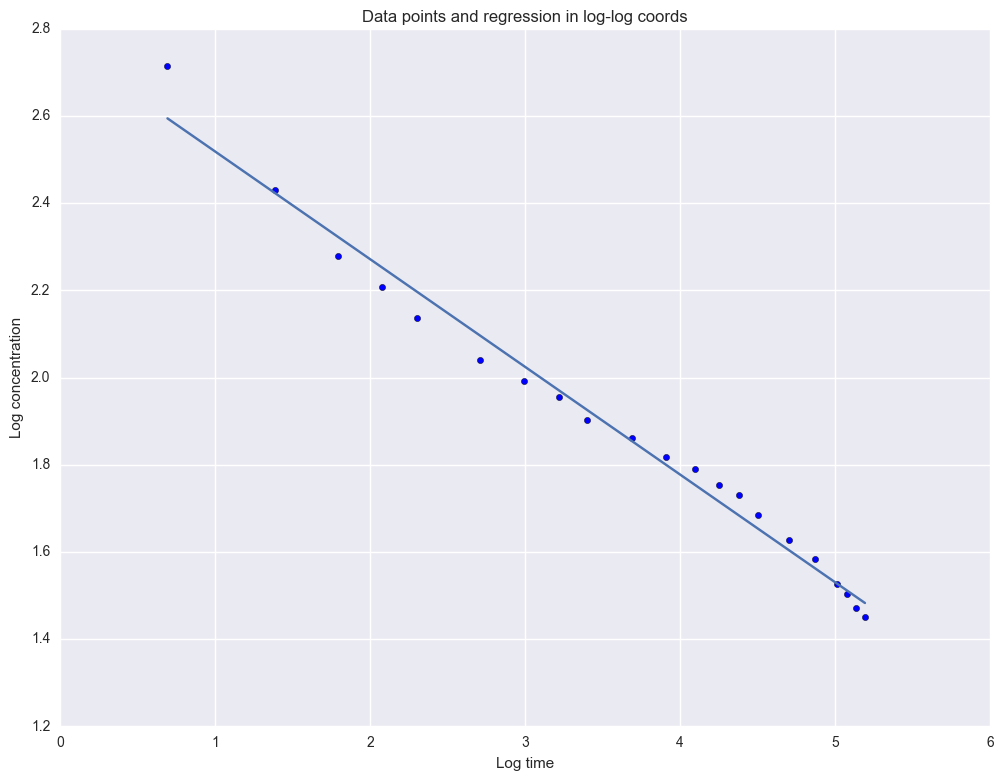

In [20]:
# creates a scatter plot of log of the data
plt.scatter(logx, logy)

# plots the linear regression line
plt.plot(logx, lslope*logx + lintercept)

plt.title('Data points and regression in log-log coords')
plt.xlabel('Log time')
plt.ylabel('Log concentration')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.show()

#### 7.9b
Now that we have the values of \begin{align} \beta_i \end{align} for the log-log coordinates. We can use these values to show the data points and regression curve in the original coordinates.

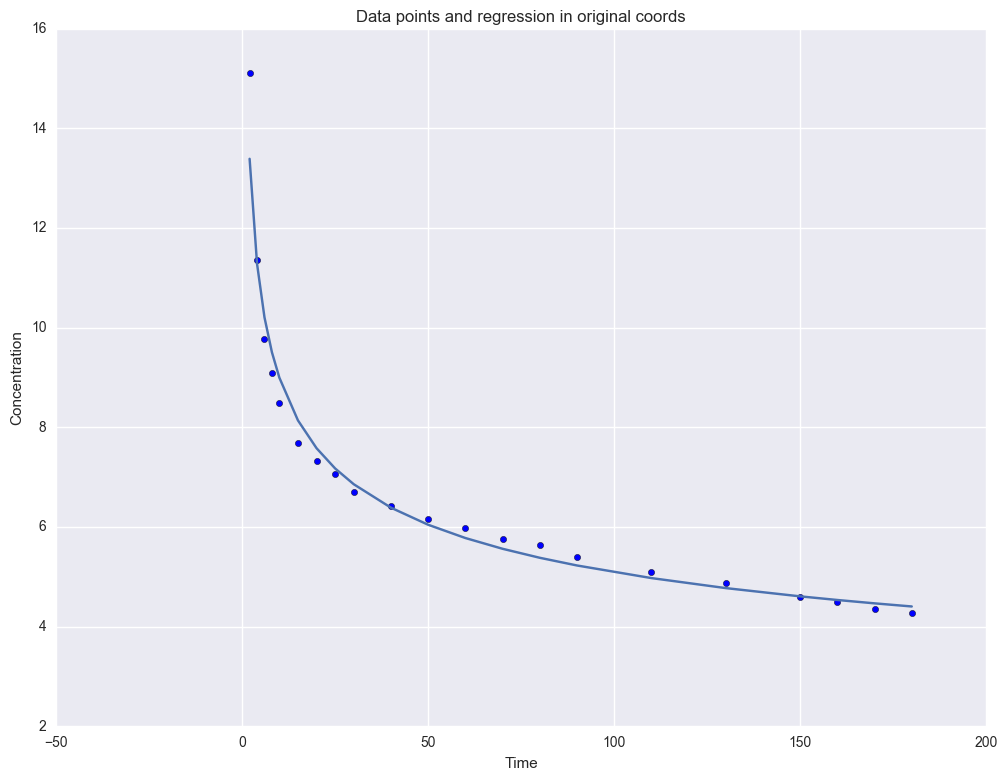

In [16]:
plt.figure()

# plots the original data points
plt.scatter(x, y)

# plots the curve of best fit
plt.plot(x, np.exp(lslope*logx + lintercept))

plt.title('Data points and regression in original coords')
plt.xlabel('Time')
plt.ylabel('Concentration')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.show()

#### 7.9c
In this problem we construct the residuals both in terms of the log time and log sulfate and the original coordinates. In addition we computed the R value of the fit as well. The value of the residuals is shown below.

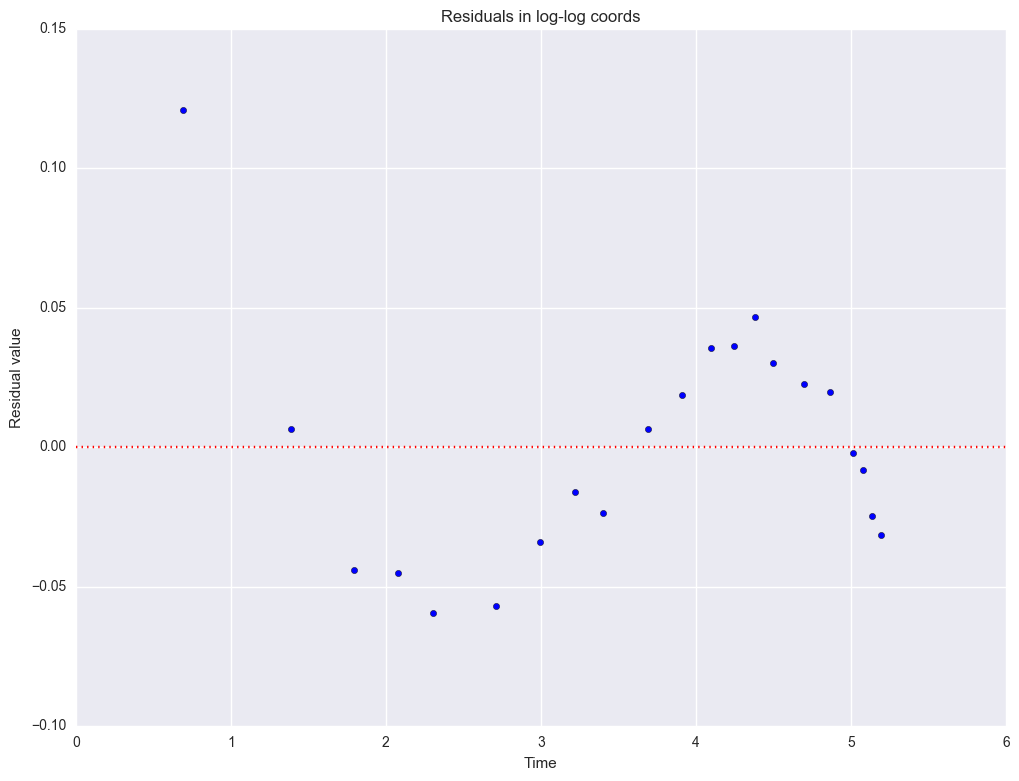

In [17]:
plt.figure()

# plots a horizontal line across the graph
plt.axhline(y=0, color='r', linestyle='dotted')

# plots the residuals in log-log coordinates
plt.scatter(logx, (logy - (lslope*logx + lintercept))) # Residual = Observed (y) - Expected (regression)

plt.title('Residuals in log-log coords')
plt.xlabel('Fitted Values of Time')
plt.ylabel('Value of Regression')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.show()

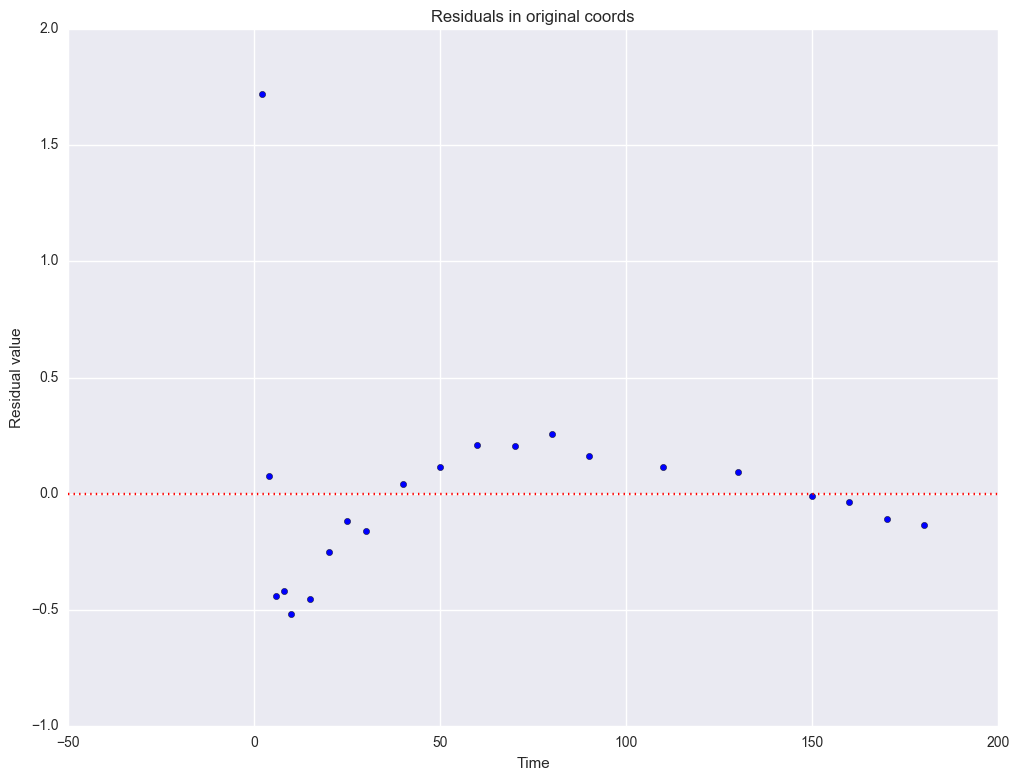

In [18]:
plt.figure()

# plots a horizontal line
plt.axhline(y=0, color='r', linestyle='dotted')

# plots the original data as a scatter plot
plt.scatter(x, y - np.exp(lslope*logx + lintercept)) # Residual = Observed (y) - Expected (regression)

plt.title('Residuals in original coords')
plt.xlabel('Time')
plt.ylabel('Residual value')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.show()

In [24]:
# prints the r-value - this was just to see the correlation
print('Correlation Coefficient: ' + str(lr_value) + '\n')

# prints the coefficient of determination (r^2)
print('Coefficient of Determination: ' + str(lr_value ** 2))

Correlation Coefficient: -0.991929983971

Coefficient of Determination: 0.983925093101


### Analysis - 7.9 D

The r-value of the logged regression is -0.9919, meaning that the log-log data shows a strong negative correlation. This is consistent with our residual plot. The original data resembles -ln(x).

The residual plots reveal that there is a slight pattern to the data that the regression line does not exactly cover, but the coefficient of determination (r^2) value of 0.9839 means that 98.39% of the variance in the sulfate concentration is explained by the regression line. 

The log-transformation gives an tremendous improvment.

Looking at the two plots of the data vs. regression line in 2 different scales, the regression line appears to be good since it does not look like it strays too far from the plot of the data.